# EDA for SegTHOR dataset

## Setup Environment

In [ ]:
# mount driver
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CardiacSeg/eda/SegtHOR

# install dependents
!pip install -q "monai-weekly[nibabel, tqdm, einops]"
!python -c "import matplotlib" || pip install -q matplotlib
%matplotlib inline

# sync python module
%load_ext autoreload
%autoreload 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/CardiacSeg/eda/SegtHOR'
/content


## Import Library

In [ ]:
import sys
# set package path
sys.path.append("/content/drive/MyDrive/CardiacSeg")

import os

from monai.data import CacheDataset, DatasetSummary
from monai.transforms import (
    Compose,
    LoadImaged,
    AddChanneld,
    Orientationd,
    Spacingd,
    ScaleIntensityRanged,
    NormalizeIntensityd
)
from monai.utils import first

import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

from data_utils.segthor_dataset import get_data_dicts
from data_utils.visualization import show_img_lbl
from data_utils.utils import get_data_info

## Prepare data dicts

In [ ]:
data_dir = '/content/drive/MyDrive/CardiacSeg/dataset/SegTHOR/train'

In [ ]:
data_dicts = get_data_dicts(data_dir)

## Show data info

In [ ]:
data_info_df = get_data_info(data_dicts)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
data_info_df

,pid,img_shape,img_space,lbl_shape,lbl_space,lbl_ids
0,Patient_01,"[512, 512, 229]","[0.9765625, 0.9765625, 2.0]","[512, 512, 229]","[0.9765625, 0.9765625, 2.0]","[0.0, 1.0, 2.0, 3.0, 4.0]"
1,Patient_02,"[512, 512, 246]","[0.976562, 0.976562, 2.5]","[512, 512, 246]","[0.976562, 0.976562, 2.5]","[0.0, 1.0, 2.0, 3.0, 4.0]"
2,Patient_03,"[512, 512, 147]","[0.976562, 0.976562, 2.5]","[512, 512, 147]","[0.976562, 0.976562, 2.5]","[0.0, 1.0, 2.0, 3.0, 4.0]"
3,Patient_04,"[512, 512, 158]","[0.976562, 0.976562, 2.5]","[512, 512, 158]","[0.976562, 0.976562, 2.5]","[0.0, 1.0, 2.0, 3.0, 4.0]"
4,Patient_05,"[512, 512, 284]","[0.9765625, 0.9765625, 2.0]","[512, 512, 284]","[0.9765625, 0.9765625, 2.0]","[0.0, 1.0, 2.0, 3.0, 4.0]"
5,Patient_06,"[512, 512, 199]","[0.976562, 0.976562, 2.5]","[512, 512, 199]","[0.976562, 0.976562, 2.5]","[0.0, 1.0, 2.0, 3.0, 4.0]"
6,Patient_07,"[512, 512, 179]","[0.9765625, 0.9765625, 2.0]","[512, 512, 179]","[0.9765625, 0.9765625, 2.0]","[0.0, 1.0, 2.0, 3.0, 4.0]"
7,Patient_08,"[512, 512, 171]","[0.976562, 0.976562, 2.5]","[512, 512, 171]","[0.976562, 0.976562, 2.5]","[0.0, 1.0, 2.0, 3.0, 4.0]"
8,Patient_09,"[512, 512, 154]","[0.976562, 0.976562, 2.5]","[512, 512, 154]","[0.976562, 0.976562, 2.5]","[0.0, 1.0, 2.0, 3.0, 4.0]"
9,Patient_10,"[512, 512, 163]","[0.9765625, 0.9765625, 2.0]","[512, 512, 163]","[0.9765625, 0.9765625, 2.0]","[0.0, 1.0, 2.0, 3.0, 4.0]"


In [ ]:
shape_df = pd.DataFrame(data_info_df['img_shape'].to_list(), columns=['w', 'h', 's'])
shape_df.mean()

w    512.0
h    512.0
s    185.5
dtype: float64

In [ ]:
space_df = pd.DataFrame(data_info_df['img_space'].to_list(), columns=['x', 'y', 'z'])
space_df.mean()

x    1.001416
y    1.001416
z    2.350000
dtype: float32

## Statcics

In [ ]:
base_tf = Compose([
    LoadImaged(keys=['image', 'label']),
    AddChanneld(keys=['image', 'label'])
])

ds = CacheDataset(
    data=data_dicts[:10],
    transform=base_tf
)

/usr/local/lib/python3.7/dist-packages/monai/utils/deprecate_utils.py:107: FutureWarning: <class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
  warn_deprecated(obj, msg, warning_category)
Loading dataset: 100%|██████████| 10/10 [00:44<00:00,  4.41s/it]


In [ ]:
# ref: https://arxiv.org/pdf/1904.08128.pdf
s = DatasetSummary(ds)
s.calculate_percentiles()
s.calculate_statistics()
data_target_space = s.get_target_spacing()

In [ ]:
print('data target space:')
data_target_space

data target space:


(0.9765620231628418, 0.9765620231628418, 2.5)

In [ ]:
print('data intensities statcics:')
data_intensities_statcics = pd.DataFrame(
    [[s.data_min, s.data_median, s.data_max, s.data_mean, s.data_std, s.data_min_percentile, s.data_max_percentile]],
    columns=['min', 'med', 'max', 'mean', 'std', 'min_percentile (0.5%)', 'max_percentile (99.5%)']
)
data_intensities_statcics

data intensities statcics:


,min,med,max,mean,std,min_percentile (0.5%),max_percentile (99.5%)
0,-1000.0,44.0,3071.0,17.550648,200.927826,-1000.0,232.0


## Transform

In [ ]:
tf = Compose([
    LoadImaged(keys=['image', 'label']),
    AddChanneld(keys=['image', 'label']),
    Orientationd(keys=["image", "label"], axcodes="RAS"),
    Spacingd(
        keys=["image", "label"],
        pixdim=(1.5, 1.5, 2.0),
        mode=("bilinear", "nearest"),
    ),
    ScaleIntensityRanged(
        keys=["image"],
        a_min=-183,
        a_max=217,
        b_min=0.0,
        b_max=1.0,
        clip=True,
    ),
    NormalizeIntensityd(
        keys=["image"],
        subtrahend=83,
        divisor=137
    )
])

ds = CacheDataset(
    data=[data_dicts[0]],
    transform=tf
)

/usr/local/lib/python3.7/dist-packages/monai/utils/deprecate_utils.py:107: FutureWarning: <class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
  warn_deprecated(obj, msg, warning_category)
Loading dataset: 100%|██████████| 1/1 [00:12<00:00, 12.05s/it]


(1, 334, 334, 229)


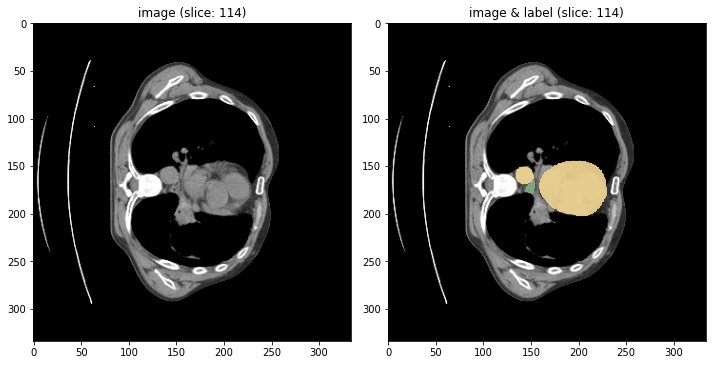

In [ ]:
data = first(ds)
print(data['image'].shape)
slice_idx = data['image'].shape[-1] // 2
show_img_lbl(
    data['image'][0,:,:,slice_idx],
    data['label'][0,:,:,slice_idx],
    slice_idx=slice_idx,
    num_classes=2,
    axis_off=False,
    fig_size=(10,5)
)

In [ ]:
tf = Compose([
    LoadImaged(keys=['image', 'label']),
    AddChanneld(keys=['image', 'label']),
    Orientationd(keys=["image", "label"], axcodes="RAS"),
    Spacingd(
        keys=["image", "label"],
        pixdim=(1.5, 1.5, 1.5),
        mode=("bilinear", "nearest"),
    ),
    ScaleIntensityRanged(
        keys=["image"],
        a_min=-175,
        a_max=250,
        b_min=0.0,
        b_max=1.0,
        clip=True,
    ),
])

ds = CacheDataset(
    data=[data_dicts[0]],
    transform=tf
)

/usr/local/lib/python3.7/dist-packages/monai/utils/deprecate_utils.py:107: FutureWarning: <class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
  warn_deprecated(obj, msg, warning_category)
Loading dataset: 100%|██████████| 1/1 [00:13<00:00, 13.84s/it]


(1, 334, 334, 229)


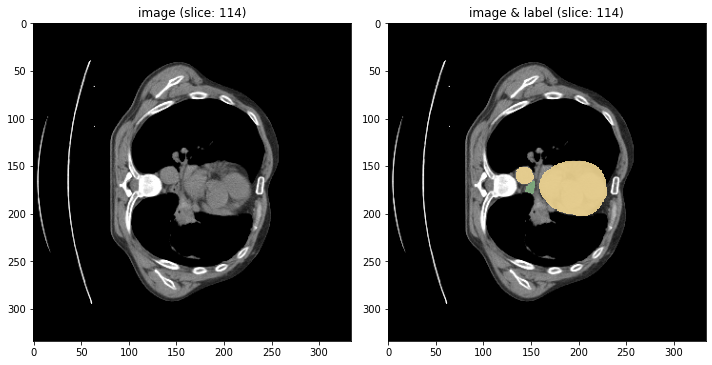

In [ ]:
data = first(ds)
print(data['image'].shape)
slice_idx = data['image'].shape[-1] // 2
show_img_lbl(
    data['image'][0,:,:,slice_idx],
    data['label'][0,:,:,slice_idx],
    slice_idx=slice_idx,
    num_classes=2,
    axis_off=False,
    fig_size=(10,5)
)

(1, 334, 334, 229)


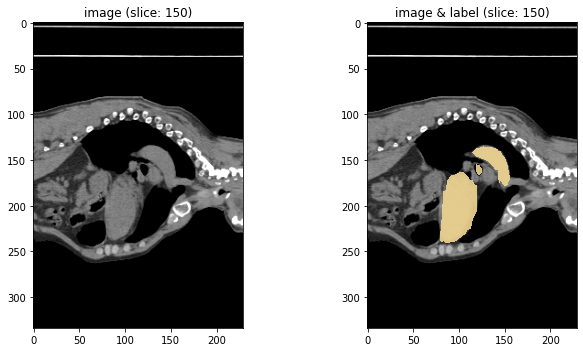

In [ ]:
print(data['image'].shape)
slice_idx = 150
show_img_lbl(
    data['image'][0,slice_idx,:,:],
    data['label'][0,slice_idx,:,:],
    slice_idx=slice_idx,
    num_classes=2,
    axis_off=False,
    fig_size=(10,5)
)

(1, 334, 334, 305)


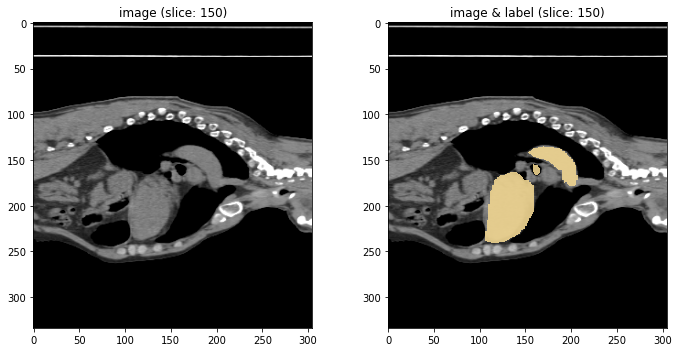

In [ ]:
data = first(ds)
print(data['image'].shape)
slice_idx = 150 #data['image'].shape[1] // 2
show_img_lbl(
    data['image'][0,slice_idx,:,:],
    data['label'][0,slice_idx,:,:],
    slice_idx=slice_idx,
    num_classes=2,
    axis_off=False,
    fig_size=(10,5)
)